# Lab 07-5 Fashion MNIST introduction

In [17]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(777)  # for reproducibility
print(tf.__version__)
print(tf.executing_eagerly())

2.8.0
True


## Data
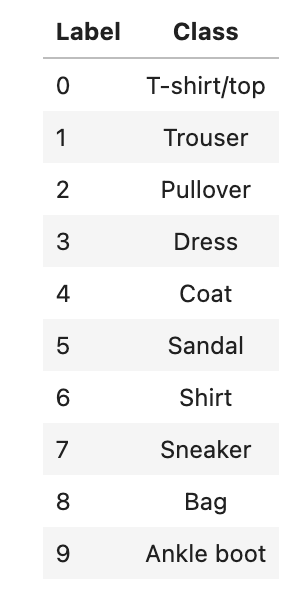

In [18]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

- Fashion MNIST Data 확인 - 4번째 배열 드레스

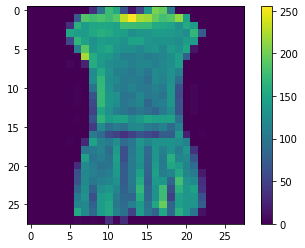

In [19]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

## TensorFlow Keras

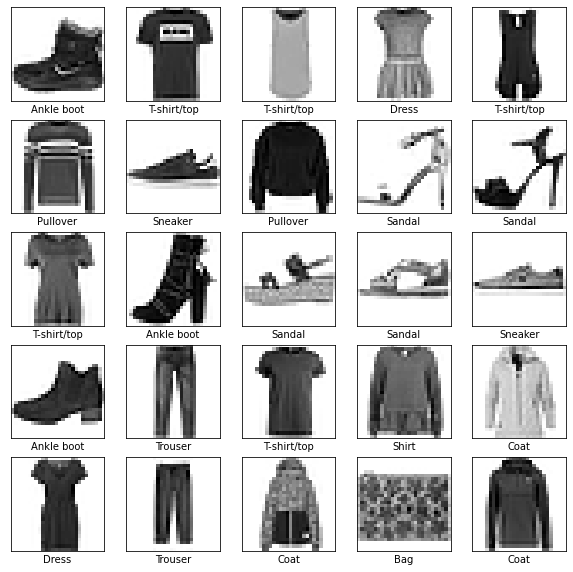

In [20]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [21]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5064 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3798 - accuracy: 0.8624
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3419 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2961 - accuracy: 0.8902


In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.3570 - accuracy: 0.8742
Test accuracy: 0.8741999864578247
